## Problem/Question

#### According to the Australian Antarctic Program (2022), there are a total of 18 species of penguins currently know, 5 of which line in Antarctica, and 4 other live on sub-Antarctic islands. For researchers, it is very important to differentiate among species to better understand mating patterns, eating cycles, and the overall development of penguins. Therefore, we believe it is important to leverage machine learning techniques to distinguish among species, and effectively predict the specie of a penguin given certain characteristics.

## Data Sources/References

#### The data used in this project was collected, cleaned, and published by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. The dataset counts with 7 variables, and a total of 344 observations. All the variables are explained in detail later in the report.
#### Three main species of penguins are analyzed. Adélie penguins, with a population of 2.4 million, and a lifespan of 15-20 years. Gentoo penguins, with a population of 400,000, and a lifespan of 12-15 years. Lastly, Chinstrap penguins, with a population of 8 million, and a lifespan of 12-15 years.
#### References:
#### Australian Antarctic Program (2022) About Antarctica, Animals, Penguins.
#### https://www.antarctica.gov.au/
#### Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

#### The dataset has 7 columns describing the three species of Penguins. The goal of the project is to create Machine Learning models to predict the Species of the Penguins, and in a similar way to predict the Sex as well. We would like to compare the performance of different models build for predicting each target variable.  The models would  also be helpful in determing the influential features if any,  in determining the Species and Sex of the Penguins. It would be interesting to see if there are any similarities or differences in the features that are most influential in determinning the two target variables.

#### The Variables in the dataset are expalined as below:

#### Species: A categorical variable indicating the species of each penguin (Adelie, Gentoo, or Chinstrap)
#### Island: A categorical variable indicating the island where each penguin was observed (Biscoe, Dream, or Torgersen)
#### culmen_length_mm: The length of the penguin’s culmen (bill) in millimeters. 
#### culmen_depth_mm: The depth of the penguin’s culmen (bill) in millimeters. 
#### flipper_length_mm: The length of the penguin’s flipper in millimeters
#### body_mass_g: The mass of the penguin’s body in grams. 
#### sex: The sex of the penguin, either male or female

## Summary of work done

#### The Analysis was done in two parts. 
#### Part I: This part is focused on predicting the Species of the Penguins with the remaining variables as Predictors. We started with Supervised Machine Learning models using Decision Tree, Random Forest, Gaussian Naive Bayes and Support Vector Machines to predict the Species, the important features influencing the prediction, and  compared the accuracies obtained from these models. 
#### We then used Unsupervised Machine Learning using Clustering with the K-means Clustering algorithm, which uses the Euclidean distance to cluster the observations. The count of observations obtained from clustering for each of the 3 clusters was compared to the actual counts of the clusters to test for accuracy. The last model used was KNN algorithm with different values of K.
#### Part II: In this part the same structure of analysis is followed as done in part I, to predict the Sex of the Penguins.
#### After the data is explored, cleaned, and appropriately encoded where needed, different machine learning models are built. These models are first trained, accuracy and confusion matrix are also analyzed The results, accuracy and confusion matrix of the model is commented. The features and their importance are also displayed.
#### Lastly, final conclusions and the Highlights of the study are presented.

## Part I: Predicitng the Species of Penguins.

### Pre-Processing

In [65]:
import pandas as pd

In [66]:
pwd()

'/Users/pratik'

In [67]:
input_file = ("/Users/pratik/Desktop/Harrisburg University programs/Courses/Late Fall Courses 2022/ANLY 530 Principles of Machine Learning/Project/penguins_size.csv")

In [68]:
data = pd.read_csv(input_file)

In [69]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [70]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [71]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Exploratory Data Analysis

[Text(0.5, 0, 'Body Mass (g)'),
 Text(0, 0.5, 'Flipper Length (mm)'),
 Text(0.5, 1.0, 'Body Mass Vs Flipper Length by Species')]

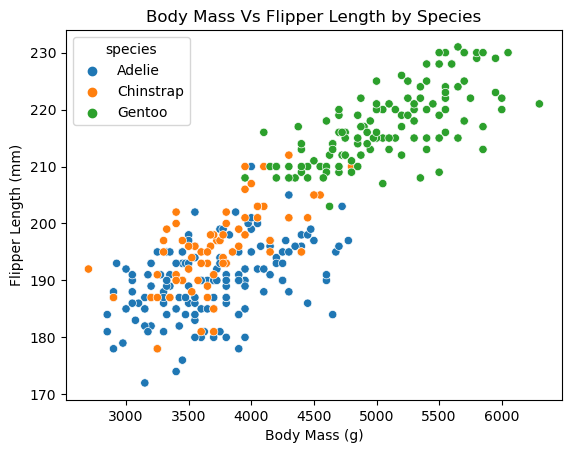

In [73]:

import seaborn as sns
plot = sns.scatterplot(x = "body_mass_g", y = "flipper_length_mm", data = data, hue = "species")
plot.set(xlabel ="Body Mass (g)", ylabel = "Flipper Length (mm)", title ='Body Mass Vs Flipper Length by Species')



#### It can be seen that the Gentoo species are heavier than the other species with a longer Flipper Length as well.

[Text(0.5, 0, 'Body Mass (g)'),
 Text(0, 0.5, 'Flipper Length (mm)'),
 Text(0.5, 1.0, 'Body Mass Vs Flipper Length by Sex')]

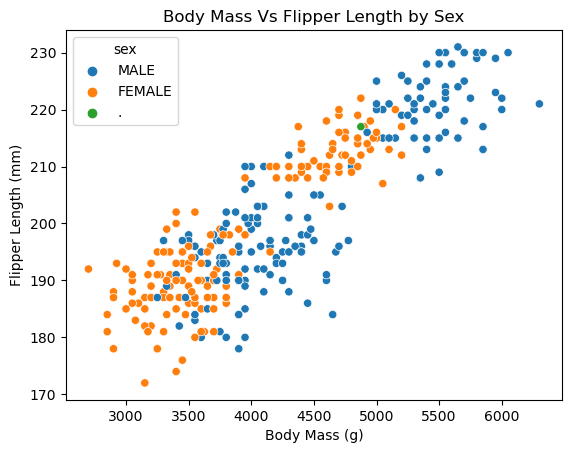

In [74]:

import seaborn as sns
plot = sns.scatterplot(x = "body_mass_g", y = "flipper_length_mm", data = data, hue = "sex")
plot.set(xlabel ="Body Mass (g)", ylabel = "Flipper Length (mm)", title ='Body Mass Vs Flipper Length by Sex')

[Text(0.5, 0, 'Body Mass (g)'),
 Text(0, 0.5, 'Culmen Depth (mm)'),
 Text(0.5, 1.0, 'Body Mass Vs Culmen Depth by Species')]

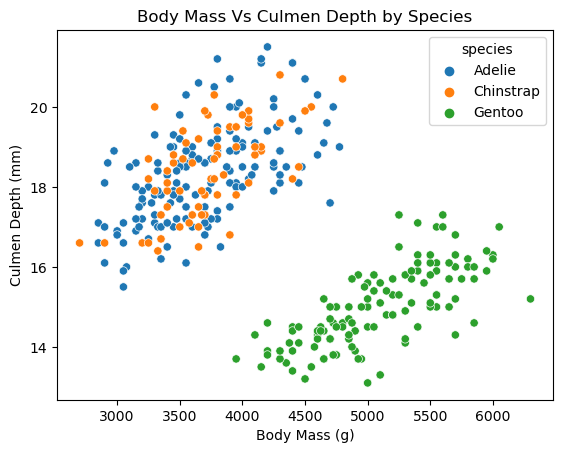

In [75]:

import seaborn as sns
plot = sns.scatterplot(x = "body_mass_g", y = "culmen_depth_mm", data = data, hue = "species")
plot.set(xlabel ="Body Mass (g)", ylabel = "Culmen Depth (mm)", title ='Body Mass Vs Culmen Depth by Species')

####  Its interesting to see that Gentoo has higher body mass compared to other species but lower Culmen Depth

[Text(0.5, 0, 'Body Mass (g)'),
 Text(0, 0.5, 'Culmen Depth (mm)'),
 Text(0.5, 1.0, 'Body Mass Vs Culmen Depth by Sex')]

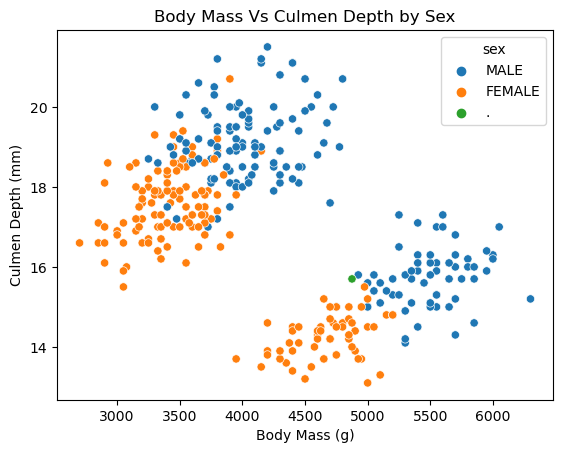

In [76]:

import seaborn as sns
plot = sns.scatterplot(x = "body_mass_g", y = "culmen_depth_mm", data = data, hue = "sex")
plot.set(xlabel ="Body Mass (g)", ylabel = "Culmen Depth (mm)", title ='Body Mass Vs Culmen Depth by Sex')

[Text(0.5, 0, 'Culmen Length (m)'),
 Text(0, 0.5, 'Culmen Depth (mm)'),
 Text(0.5, 1.0, 'Culmen Length Vs Culmen Depth by Species')]

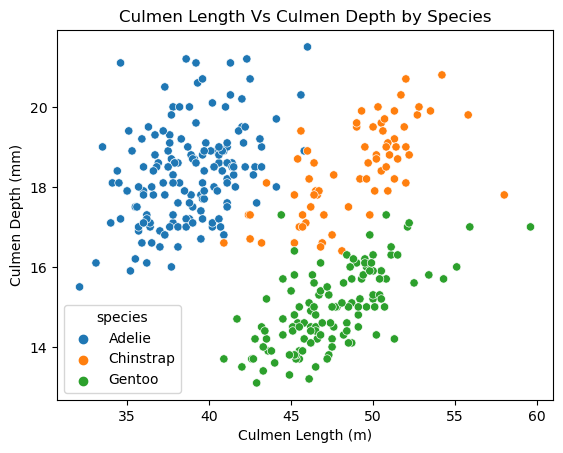

In [77]:
import seaborn as sns
plot = sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = data, hue = "species")
plot.set(xlabel ="Culmen Length (m)", ylabel = "Culmen Depth (mm)", title ='Culmen Length Vs Culmen Depth by Species')

#### The  Culmen lengths for Adelie appear to be smaller than the other two species and the Culmen depths for Gentoo appears to be smaller compared to that for Adelie and Chinstrap species

[Text(0.5, 0, 'Culmen Length (m)'),
 Text(0, 0.5, 'Culmen Depth (mm)'),
 Text(0.5, 1.0, 'Culmen Length Vs Culmen Depth by Sex')]

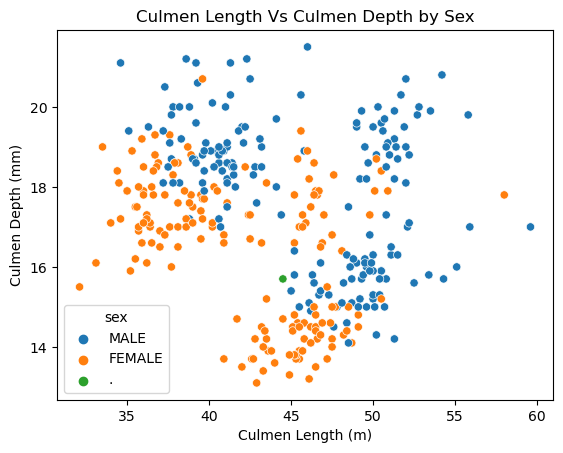

In [78]:
import seaborn as sns
plot = sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = data, hue = "sex")
plot.set(xlabel ="Culmen Length (m)", ylabel = "Culmen Depth (mm)", title ='Culmen Length Vs Culmen Depth by Sex')

#### Culmen Depth and Body Mass for Females appear to be less than that for males

#### Dropping na's

In [79]:
data.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [80]:
data = data.dropna()

In [81]:
data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Checking if any of the categorical data columns has any other values or special characters in columns other than the categories 

In [82]:
data.sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

#### Columns sex has "." as an entry,  Removing the row with  "." from the sex column.

In [83]:
data.drop(data[(data['sex'] == ".")].index, inplace = True)

In [84]:
data.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [85]:
data.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [86]:
data.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [87]:
data = data.dropna()

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


#### The observations were 344 before removing na's, 334 after removing na's and 333 after removing "."

In [89]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


#### One Hot Encoding all categorical variables (using pd.get_dummies method) except species, which is the target variable.

In [90]:
island = pd.get_dummies(data["island"], drop_first = True)
island.head()

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1


In [91]:
sex = pd.get_dummies(data["sex"], drop_first = True)
sex.head()

,MALE
0,1
1,0
2,0
4,0
5,1


#### Including the dummy columns in the dataframe and creating a new dataframe.

In [92]:
new_data = pd.concat([data,island,sex], axis = 1)

In [93]:
new_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen,MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,1,1


#### Now we can remove the island and sex columns as we have the dummies. We did not get dummies for Species as we wanted to retain that column. We will later assign numerical values to it using map function. Removing island and sex columns as below.

In [94]:
new_data.drop(['sex', 'island'], axis = 1, inplace = True)

In [95]:
new_data.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,MALE
0,Adelie,39.1,18.7,181.0,3750.0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,1,1


In [96]:
new_data.shape

(333, 8)

#### Assigning species as target variable and converting target variable to numeric

### Randomizing

In [97]:
import random
target = new_data["species"]
random.seed(12345)
indx = random.sample(range(0, 333), 333) 
new_data_rand = new_data.iloc[indx] 
target_rand = target.iloc[indx]

In [98]:
target_rand.unique()

array(['Chinstrap', 'Adelie', 'Gentoo'], dtype=object)

In [99]:
target_rand = target_rand.map({'Adelie' : 0, 'Chinstrap' : 1, 'Gentoo' : 2})
target_rand.unique()

array([1, 0, 2])

## Decision Tree Classifier

#### Assinging target to Y, predictors to X and splitting into Train and Test in the ratio of 70:30

In [100]:
Y = target_rand
X = new_data_rand.drop(["species"], axis = 1)

In [101]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,MALE
219,50.2,18.7,198.0,3775.0,1,0,0
6,38.9,17.8,181.0,3625.0,0,1,0
158,46.1,18.2,178.0,3250.0,1,0,0
194,50.9,19.1,196.0,3550.0,1,0,1
105,39.7,18.9,184.0,3550.0,0,0,1


In [102]:
from sklearn.model_selection import train_test_split
Y = target_rand
X = new_data_rand.drop(["species"], axis = 1)

In [103]:
target_rand.value_counts()

0    146
2    119
1     68
Name: species, dtype: int64

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 52)

In [105]:
Y_train.value_counts() / Y_train.shape

0    0.442060
2    0.334764
1    0.223176
Name: species, dtype: float64

In [106]:
Y_test.value_counts() / Y_test.shape

0    0.43
2    0.41
1    0.16
Name: species, dtype: float64

In [107]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)

#### Model Evaluation

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [40]:
Y_predict = model.predict(X_test)

In [41]:
print(confusion_matrix(Y_test, Y_predict))

[[42  0  1]
 [ 0 16  0]
 [ 0  1 40]]


In [42]:
print(accuracy_score(Y_predict, Y_test)*100)

98.0


## Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
print("X_train shape is : ", X_train.shape)
print("X_test shape is : ", X_test.shape)
print("Y_train shape is : ", Y_train.shape)
print("Y_test shape is : ", Y_test.shape)

X_train shape is :  (233, 7)
X_test shape is :  (100, 7)
Y_train shape is :  (233,)
Y_test shape is :  (100,)


In [109]:
clf = RandomForestClassifier()
model = clf.fit(X_train, Y_train)

#### Model Evaluation

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
Y_predict = clf.predict(Y_test)


/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 1. 2. 2. 1. 0. 1. 0. 0. 1. 2. 0. 2. 2. 1. 2. 0. 2. 2. 2. 1. 0. 2.
 0. 1. 0. 0. 1. 0. 0. 2. 2. 2. 1. 2. 2. 2. 2. 2. 0. 0. 1. 0. 2. 0. 0. 2.
 0. 0. 0. 1. 2. 0. 0. 0. 0. 2. 2. 2. 2. 2. 1. 2. 0. 2. 0. 2. 2. 0. 2. 2.
 1. 0. 2. 0. 0. 2. 0. 1. 0. 2. 2. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 2. 2. 1.
 2. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
print(confusion_matrix(Y_test, Y_predict))

[[42  0  1]
 [ 0 16  0]
 [ 0  1 40]]


In [47]:
print(accuracy_score(Y_test, Y_predict)*100)

98.0


### Importance of Features

In [111]:
import pandas as pd
feature_importances = pd.DataFrame(clf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False) 
feature_importances

,importance
culmen_length_mm,0.361656
flipper_length_mm,0.191926
culmen_depth_mm,0.178203
body_mass_g,0.126603
Dream,0.108121
Torgersen,0.027580
MALE,0.005911


#### The above results show there was no change in accuracy when we used Random Forest algorithm after first using the Decision Tree Classifier. Both showed an accuracy of 98%.  Culmen lnength, Flipper Length, and CIlmen Depth were the top three most important features in predicitng the Species of Penguins, in that order.

## Gaussian Naive Bayes Classifier

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 52)
Y_train.value_counts() / Y_train.shape

0    0.442060
2    0.334764
1    0.223176
Name: species, dtype: float64

In [50]:
Y_test.value_counts() / Y_test.shape

0    0.43
2    0.41
1    0.16
Name: species, dtype: float64

In [51]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, Y_train)

#### Model Evaluation

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test, Y_predict))

[[33 10  0]
 [ 0 16  0]
 [ 0  0 41]]


In [53]:
print(accuracy_score(Y_test, Y_predict)*100)

90.0


#### Above results show that Gaussian Naive Bayes gives us an accuracy of 90% which is less than the 98% accuracy  obtained for both the Decision Tree and Random Forest Classifiers.

## Support Vector Machines

In [54]:
new_data_rand.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,MALE
219,Chinstrap,50.2,18.7,198.0,3775.0,1,0,0
6,Adelie,38.9,17.8,181.0,3625.0,0,1,0
158,Chinstrap,46.1,18.2,178.0,3250.0,1,0,0
194,Chinstrap,50.9,19.1,196.0,3550.0,1,0,1
105,Adelie,39.7,18.9,184.0,3550.0,0,0,1


In [55]:
Y = target_rand
X = new_data_rand.drop(["species"], axis = 1)

In [56]:
Y.head()

219    1
6      0
158    1
194    1
105    0
Name: species, dtype: int64

#### Normalizing the X variables

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
print(scaled)

[[0.65818182 0.66666667 0.44067797 ... 1.         0.         0.        ]
 [0.24727273 0.55952381 0.15254237 ... 0.         1.         0.        ]
 [0.50909091 0.60714286 0.10169492 ... 1.         0.         0.        ]
 ...
 [0.41454545 0.25       0.69491525 ... 0.         0.         0.        ]
 [0.48363636 0.66666667 0.27118644 ... 1.         0.         0.        ]
 [0.16       0.58333333 0.16949153 ... 1.         0.         0.        ]]


#### Update new scaled X for data modelling

In [58]:
from sklearn.model_selection import train_test_split
Y = target_rand
X = scaled
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 52)

In [59]:
Y_train.value_counts() / Y_train.shape

0    0.442060
2    0.334764
1    0.223176
Name: species, dtype: float64

In [60]:
Y_test.value_counts() / Y_test.shape

0    0.43
2    0.41
1    0.16
Name: species, dtype: float64

In [61]:
X_train.shape

(233, 7)

In [62]:
Y_train.shape

(233,)

In [63]:
X_test.shape

(100, 7)

In [64]:
Y_test.shape

(100,)

### Designing the model

In [65]:
from sklearn import svm
clf = svm.SVC(kernel = "linear")
model = clf.fit(X_train, Y_train)

In [66]:
Y_predict = model.predict(X_test)

#### Model Evaluation

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(Y_test, Y_predict))

[[43  0  0]
 [ 0 16  0]
 [ 0  0 41]]


In [68]:
print(accuracy_score(Y_test, Y_predict)*100)

100.0


#### We get an accracy of 100% using the Linear Kernel. This model correctly classified all the Species of Penguins.

### Using RBF Kernel

In [69]:
clf = svm.SVC(kernel='rbf', degree = 8) 
model = clf.fit(X_train, Y_train) 
Y_predict = model.predict(X_test) 
print(confusion_matrix(Y_test, Y_predict))

[[43  0  0]
 [ 0 16  0]
 [ 0  0 41]]


In [70]:
print(accuracy_score(Y_test, Y_predict)*100)

100.0


### Using polynomial Kernel

In [71]:
clf = svm.SVC(kernel='poly', gamma =0.3) 
model = clf.fit(X_train, Y_train) 
Y_predict = model.predict(X_test) 
print(confusion_matrix(Y_test, Y_predict))

[[43  0  0]
 [ 1 15  0]
 [ 0  0 41]]


In [72]:
print(accuracy_score(Y_test, Y_predict)*100)

99.0


#### As seen above, we got an accuracy of 100%  with the Linear kerneal and RBF kernel(Non-Linear) for Support Vector Machine classifiers  and 99% for the Polynomial kernel(Non-Linear).


#### We used Decision Tree, Random Forest, Gaussiand Naive Bayes and Support Vector Machine models for predicting the species of penguins. Out of the three models used, two models gave an accuracy of 98% with the exception of  Gaussian Naive bayes which predicted the species with a lower accuracy ay 90%, compared to the other three models. Support Vector Machines gave an accuracy of 100% for the Linear an dRBF kernel and 99% when using the polynomial kernel.

## Unsupervised: Clustering using the K-means algorithm

In [73]:
new_data_rand.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,MALE
219,Chinstrap,50.2,18.7,198.0,3775.0,1,0,0
6,Adelie,38.9,17.8,181.0,3625.0,0,1,0
158,Chinstrap,46.1,18.2,178.0,3250.0,1,0,0
194,Chinstrap,50.9,19.1,196.0,3550.0,1,0,1
105,Adelie,39.7,18.9,184.0,3550.0,0,0,1


#### Normalizing

In [75]:
Y = target_rand
X = new_data_rand.drop(["species"], axis = 1)
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,MALE
219,50.2,18.7,198.0,3775.0,1,0,0
6,38.9,17.8,181.0,3625.0,0,1,0
158,46.1,18.2,178.0,3250.0,1,0,0
194,50.9,19.1,196.0,3550.0,1,0,1
105,39.7,18.9,184.0,3550.0,0,0,1


In [76]:
Y.head()

219    1
6      0
158    1
194    1
105    0
Name: species, dtype: int64

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
print(scaled)

[[0.65818182 0.66666667 0.44067797 ... 1.         0.         0.        ]
 [0.24727273 0.55952381 0.15254237 ... 0.         1.         0.        ]
 [0.50909091 0.60714286 0.10169492 ... 1.         0.         0.        ]
 ...
 [0.41454545 0.25       0.69491525 ... 0.         0.         0.        ]
 [0.48363636 0.66666667 0.27118644 ... 1.         0.         0.        ]
 [0.16       0.58333333 0.16949153 ... 1.         0.         0.        ]]


In [78]:
Y = target_rand
X = scaled

#### Determining the best value of K clusters using the predictor variebles and Kmeans Clustering and random seed of 12345 .(Note: species as Y=target is maped to numeric, however species in new_data is not.)

At k=  1 The percentage of change in SSE is  99.99847719635022 %
At k=  2 The percentage of change in SSE is  34.438660476557246 %
At k=  3 The percentage of change in SSE is  33.20816022869925 %
At k=  4 The percentage of change in SSE is  29.775775145226262 %
At k=  5 The percentage of change in SSE is  40.44501333768008 %
At k=  6 The percentage of change in SSE is  26.435420116534058 %
At k=  7 The percentage of change in SSE is  31.25444566076953 %
At k=  8 The percentage of change in SSE is  37.22018068641265 %
At k=  9 The percentage of change in SSE is  17.967286903698497 %
At k=  10 The percentage of change in SSE is  15.891489060276145 %
At k=  11 The percentage of change in SSE is  7.297052685601946 %
At k=  12 The percentage of change in SSE is  4.281490997278908 %
At k=  13 The percentage of change in SSE is  3.098632216159535 %
At k=  14 The percentage of change in SSE is  3.6327810730025667 %
At k=  15 The percentage of change in SSE is  4.189420625521325 %
At k=  16 The

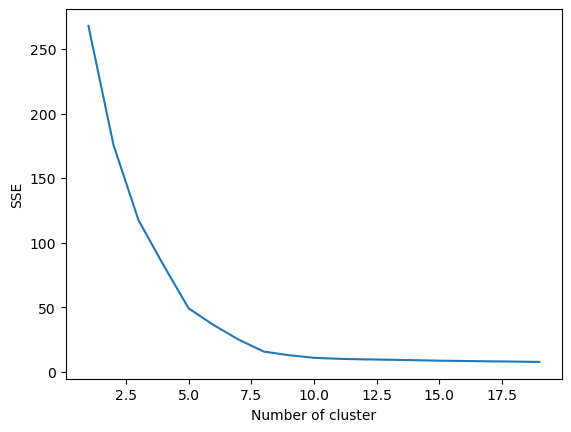

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
last_sse = 17592402.70373319
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=12345, n_init = 25).fit(X) ## Note X is scaled
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    change_per = (last_sse-kmeans.inertia_)/last_sse*100
    print ('At k= ',k,'The percentage of change in SSE is ',change_per,'%') 
    last_sse = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values())) 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### Two elbows can be seen in the graph fromone from K =3 to K=5 and the other from k=5 to k=8 . We can say that K in this range (3 to 8) seems like a good fit as the change in percentage of sse is more compared to the values above K=8, within group error is considerably less compared to values below K=3 and the between group distance looks acceptable.

In [83]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1234, n_init = 25 ).fit(X)
kmeans.cluster_centers_

array([[ 4.40798226e-01,  6.23790166e-01,  3.59101557e-01,
         2.83028455e-01,  1.00000000e+00,  1.94289029e-16,
         5.04065041e-01],
       [ 4.94614065e-01,  4.88544474e-01,  6.32235369e-01,
         6.03446017e-01, -1.66533454e-16,  2.16981132e-01,
         1.00000000e+00],
       [ 3.59265734e-01,  3.13759158e-01,  5.02933507e-01,
         3.90625000e-01, -1.66533454e-16,  2.30769231e-01,
         5.55111512e-16]])

In [84]:
pd.Series(kmeans.labels_).value_counts()

0    123
1    106
2    104
dtype: int64

In [90]:
target_rand.value_counts()

0    146
2    119
1     68
Name: species, dtype: int64

In [92]:
print(confusion_matrix(kmeans.labels_, target_rand))

[[55 68  0]
 [45  0 61]
 [46  0 58]]


In [93]:
print(accuracy_score(kmeans.labels_, target_rand)*100)

33.933933933933936


#### The accuracy score was found to be less when comparing the clusters obtained form K-means algorithm. One of the reasons responsilbe for some misclassifications could be that the predicted  K_means_ clusters has the species with the second highest counts labelled as 1 and the second highest counts in target_rand is labelled as 2. 

## Supervised: KNN Classification algorithm 

In [562]:
Y = target_rand
X = scaled
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 52)

### KNN Classification model with K = 3

In [563]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=3) 
model = neigh.fit(X, Y)
Y_predict = model.predict(X_test)

/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [564]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(Y_test, Y_predict))

[[43  0  0]
 [ 0 16  0]
 [ 0  0 41]]


In [565]:
print(accuracy_score(Y_test, Y_predict)*100)

100.0


#### We get an accuracy of 100 % with K=3 

### Model with K=5

neigh = KNeighborsClassifier(n_neighbors=5) 
model = neigh.fit(X, Y)
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test, Y_predict))

In [567]:
Y_predict

array([0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0])

In [568]:
print(accuracy_score(Y_test, Y_predict)*100)

100.0


## Model with K = 8 

In [569]:
neigh = KNeighborsClassifier(n_neighbors=8) 
model = neigh.fit(X, Y)
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test, Y_predict))

[[43  0  0]
 [ 0 16  0]
 [ 0  0 41]]


/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [570]:
print(accuracy_score(Y_test, Y_predict)*100)

100.0


#### All values of K used gave an accuracy of 100% in predicitng the Species of the Penguins.

### Model I: Conclusion

#### For predicting the Species of the penguins, both the KNN algorithm and  Support Vector Machines (Linear and RBF) gave the maximum accuracy at 100% followed by the Polynomial Kernel SVM at 99%. The Random Forest and Decision Tree Classifiers both predcited with  an accuracy both at 97% and the Gaussian Naive bayes gave us the least accuracy at 90%. Random Forest predicted  Culmen lnength, Flipper Length, and CuImen Depth as the top three important features in predicting the Species, in that order.

## Model II:  Predicting the sex of Penguins

In [129]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [130]:
data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### One Hot Encoding Species and Island. not encoding Sex as we need to retain the column in dataframe for analysis

In [131]:
island = pd.get_dummies(data["island"], drop_first = True)
species = pd.get_dummies(data["species"], drop_first = True)
island.head()

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1


In [132]:
species.head()

,Chinstrap,Gentoo
0,0,0
1,0,0
2,0,0
4,0,0
5,0,0


#### Including the dummy columns in the dataframe and creating a new dataframe

In [133]:
new_data = pd.concat([data, species, island], axis = 1)

In [134]:
new_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Chinstrap,Gentoo,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,0,0,1


#### Dropping species and island from the dataframe

In [135]:
new_data.drop(['species', 'island'], axis = 1, inplace = True)
new_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Chinstrap,Gentoo,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,MALE,0,0,0,1
1,39.5,17.4,186.0,3800.0,FEMALE,0,0,0,1
2,40.3,18.0,195.0,3250.0,FEMALE,0,0,0,1
4,36.7,19.3,193.0,3450.0,FEMALE,0,0,0,1
5,39.3,20.6,190.0,3650.0,MALE,0,0,0,1


#### Assigning sex to target and converting target to numeric and randomizing the data.

In [163]:
import random
target = new_data["sex"]
random.seed(12345)
indx = random.sample(range(0, 333), 333) 
new_data_rand = new_data.iloc[indx] 
target_rand = target.iloc[indx]

In [164]:
target.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [165]:
target_rand = target_rand.map({'MALE' : 0, 'FEMALE' : 1})
target_rand.unique()

array([1, 0])

## Desision Tree Classifier

In [166]:
Y = target_rand
X = new_data_rand.drop(["sex"],axis = 1)

In [167]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Chinstrap,Gentoo,Dream,Torgersen
219,50.2,18.7,198.0,3775.0,1,0,1,0
6,38.9,17.8,181.0,3625.0,0,0,0,1
158,46.1,18.2,178.0,3250.0,1,0,1,0
194,50.9,19.1,196.0,3550.0,1,0,1,0
105,39.7,18.9,184.0,3550.0,0,0,0,0


In [168]:
Y.head()

219    1
6      1
158    1
194    0
105    0
Name: sex, dtype: int64

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 52)

In [170]:
Y_train.value_counts() / Y_train.shape

0    0.519313
1    0.480687
Name: sex, dtype: float64

In [171]:
Y_test.value_counts() / Y_test.shape

1    0.53
0    0.47
Name: sex, dtype: float64

In [172]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
model = tree.fit(X_train, Y_train)

### Model Evaluation

In [173]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test, Y_predict))

[[41  6]
 [ 4 49]]


In [174]:
print(accuracy_score(Y_test, Y_predict)*100)

90.0


#### Using Decision Tree gives us an accuracy of 90%. The percentage of False Positives and False Negative classified were fairly close to each other at 4% and 6% respectively.

## Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model = clf.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test,Y_predict))

[[43  4]
 [ 5 48]]


In [179]:
print(accuracy_score(Y_test, Y_predict)*100)

91.0


### Importance of Features

In [177]:
import pandas as pd
feature_importances = pd.DataFrame(clf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False) 
feature_importances

,importance
culmen_depth_mm,0.292731
body_mass_g,0.284620
culmen_length_mm,0.227383
flipper_length_mm,0.131163
Gentoo,0.027388
Chinstrap,0.016665
Dream,0.011612
Torgersen,0.008439


#### The  most important features in predicting the Sex of the Penguins were the Culmin_depth, body_mass and Culmin_length in that order.

#### Using Random Forest increased the accuracy to 91%

## Gaussian Naive Bayes Algorithm

In [180]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test,Y_predict))

[[30 17]
 [20 33]]


In [181]:
print(accuracy_score(Y_test, Y_predict)*100)

63.0


#### The accuracy decreased to 63 % by using the Gaussian Naive Bayes classifier

## Support Vector Machines

#### Normalizing the X variables

In [182]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Chinstrap,Gentoo,Dream,Torgersen
219,50.2,18.7,198.0,3775.0,1,0,1,0
6,38.9,17.8,181.0,3625.0,0,0,0,1
158,46.1,18.2,178.0,3250.0,1,0,1,0
194,50.9,19.1,196.0,3550.0,1,0,1,0
105,39.7,18.9,184.0,3550.0,0,0,0,0


In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
print(scaled)

[[0.65818182 0.66666667 0.44067797 ... 0.         1.         0.        ]
 [0.24727273 0.55952381 0.15254237 ... 0.         0.         1.        ]
 [0.50909091 0.60714286 0.10169492 ... 0.         1.         0.        ]
 ...
 [0.41454545 0.25       0.69491525 ... 1.         0.         0.        ]
 [0.48363636 0.66666667 0.27118644 ... 0.         1.         0.        ]
 [0.16       0.58333333 0.16949153 ... 0.         1.         0.        ]]


In [184]:
Y = target_rand
X = scaled
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 52)

In [185]:
from sklearn import svm
clf = svm.SVC(kernel = "linear")
model = clf.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test, Y_predict))

[[42  5]
 [ 5 48]]


In [186]:
print(accuracy_score(Y_test, Y_predict)*100)

90.0


#### As we see the Linear Kernel gives an accuracy of 90%

### RBF Kernel

In [187]:
clf = svm.SVC(kernel='rbf', degree = 8) 
model = clf.fit(X_train, Y_train) 
Y_predict = model.predict(X_test) 
print(confusion_matrix(Y_test, Y_predict))

[[44  3]
 [ 5 48]]


In [188]:
print(accuracy_score(Y_test, Y_predict)*100)

92.0


#### Using the RBF Kernel the accuracy increased to 92%

### Polynomial Kernel

In [189]:
clf = svm.SVC(kernel='poly', gamma =0.3) 
model = clf.fit(X_train, Y_train) 
Y_predict = model.predict(X_test) 
print(confusion_matrix(Y_test, Y_predict))

[[31 16]
 [ 3 50]]


In [190]:
print(accuracy_score(Y_test, Y_predict)*100)

81.0


#### The polynomail kernel gave the least accuracy between the 3 Kernels used at 81%

## Unsupervised: Clustering using the K-means algorithm

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
Y = target_rand
X = scaled
print(X)

[[0.65818182 0.66666667 0.44067797 ... 0.         1.         0.        ]
 [0.24727273 0.55952381 0.15254237 ... 0.         0.         1.        ]
 [0.50909091 0.60714286 0.10169492 ... 0.         1.         0.        ]
 ...
 [0.41454545 0.25       0.69491525 ... 1.         0.         0.        ]
 [0.48363636 0.66666667 0.27118644 ... 0.         1.         0.        ]
 [0.16       0.58333333 0.16949153 ... 0.         1.         0.        ]]


At k=  1 The percentage of change in SSE is  99.998208072535 %
At k=  2 The percentage of change in SSE is  48.81790114012003 %
At k=  3 The percentage of change in SSE is  52.222510950290946 %
At k=  4 The percentage of change in SSE is  45.4073175382075 %
At k=  5 The percentage of change in SSE is  54.12067371485251 %
At k=  6 The percentage of change in SSE is  19.672990727569847 %
At k=  7 The percentage of change in SSE is  12.240089585935465 %
At k=  8 The percentage of change in SSE is  9.57089372768644 %
At k=  9 The percentage of change in SSE is  9.92506387510864 %
At k=  10 The percentage of change in SSE is  10.269031034868561 %
At k=  11 The percentage of change in SSE is  8.656628110688978 %
At k=  12 The percentage of change in SSE is  5.469863889931658 %
At k=  13 The percentage of change in SSE is  3.9109261926731316 %
At k=  14 The percentage of change in SSE is  4.289380163025055 %
At k=  15 The percentage of change in SSE is  3.2092043953886145 %
At k=  16 The perc

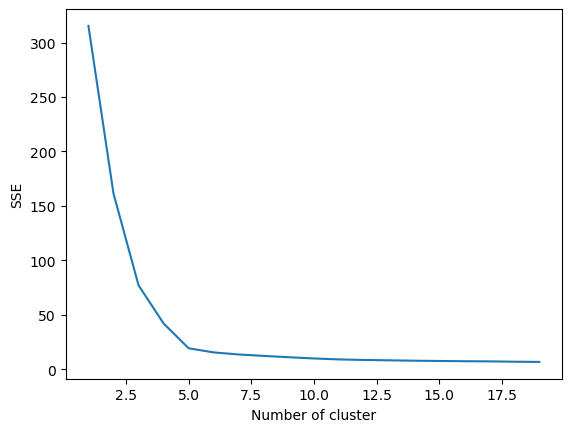

In [192]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
last_sse = 17592402.70373319
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=12345, n_init = 25).fit(X) ## Note X is scaled
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    change_per = (last_sse-kmeans.inertia_)/last_sse*100
    print ('At k= ',k,'The percentage of change in SSE is ',change_per,'%') 
    last_sse = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values())) 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### An elbow can be seen in the graph from K =3 to K=5 , we can say that K in this range seems  like a good fit as the change in percentage of sse is more compared to the values above K=5, within group error is considerably less compared to values below K=3 and the between group distance looks acceptable.

In [193]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1234, n_init = 25 ).fit(X)
kmeans.cluster_centers_

array([[ 5.62475172e-01,  2.25790316e-01,  7.66699900e-01,
         6.64565826e-01,  2.77555756e-17,  1.00000000e+00,
        -1.11022302e-16,  2.22044605e-16],
       [ 3.60169924e-01,  6.27447708e-01,  3.37636623e-01,
         2.81866563e-01,  3.17757009e-01, -3.33066907e-16,
         5.74766355e-01,  2.19626168e-01]])

In [194]:
pd.Series(kmeans.labels_).value_counts()

1    214
0    119
dtype: int64

In [195]:
target_rand.value_counts()

0    168
1    165
Name: sex, dtype: int64

In [196]:
print(confusion_matrix(kmeans.labels_, target_rand))

[[ 61  58]
 [107 107]]


In [197]:
print(accuracy_score(kmeans.labels_, target_rand)*100)

50.45045045045045


#### We used K= 2 for clustering to test the accuracy of predicting the classes., which came out to be 50.45%

### Supervised: Using KNN algorithm

### Model with K = 3

In [198]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=3) 
model = neigh.fit(X, Y)
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test, Y_predict))

[[45  2]
 [ 4 49]]


/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [199]:
print(accuracy_score(Y_test, Y_predict)*100)

94.0


#### Using KNN algorithm gives an accuracy of 94%

### Model with K= 5

In [200]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=5) 
model = neigh.fit(X, Y)
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test, Y_predict))

[[45  2]
 [ 3 50]]


/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [201]:
print(accuracy_score(Y_test, Y_predict)*100)

95.0


### MODEL WITH K = 6

In [202]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=6) 
model = neigh.fit(X, Y)
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test, Y_predict))

[[46  1]
 [ 3 50]]


/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [203]:
print(accuracy_score(Y_test, Y_predict)*100)

96.0


### MODEL WITH K = 10

In [204]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=10) 
model = neigh.fit(X, Y)
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test, Y_predict))

[[44  3]
 [ 4 49]]


/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [205]:
print(accuracy_score(Y_test, Y_predict)*100)

93.0


### MODEL WITH K = 20

In [206]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=18) 
model = neigh.fit(X, Y)
Y_predict = model.predict(X_test)
print(confusion_matrix(Y_test, Y_predict))

[[40  7]
 [ 7 46]]


/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [207]:
print(accuracy_score(Y_test, Y_predict)*100)

86.0


#### The  model with K = 6 gave us the highest accuracy of 96%. The accuracy increased from K=3 to k=-5 and to K=6. However increasing the values of K beyond 7 to 10,18 resulted in decrease in accuracies to 93 % and 86% respectively.

## Part II: Conclusion


#### In predictng the Sex of Penguins,the accuracy of Descision Tree Classifier was 90% which furhter increased to 91% by using the Random Forest classifier. The Accuracy decreased to 63% when using the Gaussian Naive Bayes algorithm. Random Forest predicted  the Culmin_depth, body_mass and Culmin_length as the top three most important features in that order. 

#### The RBF Kernel in Support vector machines gave the maximum accuracy of 92% amongst all Kernels used, followed closely by Linear Kernel at 90%. Polynomial Kernel resulted in a decrease of accuracy to 81%. We then used Clustering to predict the best value of  number of clusters using the Kmeans algorithm. From the Elbow method, value of K in the range of 3 to 5 seemed like a good range. We then used the KNN algorithm to predict the sex which resulted in a maximum accuracy of 96% at K=6. 

#### Hence amongst all the algorithms used, KNN algorithm (k=6) gave the maximum accuracy at 96%, followed by the Support Vector machines RBF Kernel predicted at 92%, Random Forest at 91% and Decision Tree Classifer at 90%.

## Highlights

#### It was interesting to see that the Culmen length, Flipper Length, and Culmen Depth were the Top Three most important features in predicting the Species, which changed to Culmin_depth, body_mass and Culmin_length when predciting the Sex of the Penguins.